In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf



In [38]:
plt.style.use('fivethirtyeight')

In [39]:
var_set = pd.read_csv('var_set.csv', parse_dates=[0],index_col=[0])
var_set.index.name = 'date'

In [42]:
Descriptive_table = var_set.describe()
not_fish = ['Month','TWI','CPI']
fish_Descriptive_table = Descriptive_table.drop(not_fish, axis = 1)
print(fish_Descriptive_table.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  SalmonPrice &    CodPrice &  HalibutPrice \\
\midrule
count &   507.000000 &  507.000000 &    507.000000 \\
mean  &    56.746134 &   24.553419 &     58.029858 \\
std   &    15.455462 &    8.096777 &      7.900179 \\
min   &    27.870000 &   10.275557 &     36.507234 \\
25\%   &    44.875000 &   20.365239 &     51.971903 \\
50\%   &    55.460000 &   24.035290 &     59.300626 \\
75\%   &    65.710000 &   30.478502 &     63.418690 \\
max   &   125.870000 &   49.076318 &     79.182888 \\
\bottomrule
\end{tabular}



/var/folders/yt/mpx6rdmx5bq2348c28xxvfj80000gn/T/ipykernel_42449/732445529.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(fish_Descriptive_table.to_latex())


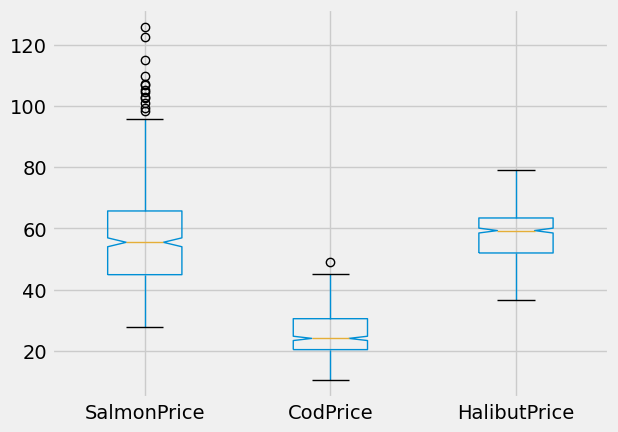

In [ ]:
Whisker=var_set.boxplot(column=['SalmonPrice','CodPrice','HalibutPrice'],grid=True,backend='matplotlib',notch=True,vert=True, widths=.4)
plt.savefig('Figures/Descriptive/Whisker.png', dpi=300, bbox_inches='tight')

In [41]:
var_set['Month'] = pd.DatetimeIndex(var_set.index).month

In [ ]:
var_set.head(10)

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI,Month
date,,,,,,
2013-04-07,39.63,10.754267,47.577612,95.55,92.1500,4
2013-04-14,41.89,10.800751,47.924958,95.70,92.1920,4
2013-04-21,43.07,10.774089,47.092639,95.85,92.7980,4
2013-04-28,42.70,10.569605,47.193296,96.00,93.8080,4
2013-05-05,41.81,10.605343,48.987917,96.02,93.3125,5
2013-05-12,41.81,10.491056,48.199836,96.05,93.2225,5
2013-05-19,42.90,10.936346,49.206759,96.08,92.4525,5
2013-05-26,43.57,10.497166,48.563055,96.10,92.0400,5
2013-06-02,40.60,11.991400,49.437460,96.00,92.8700,6


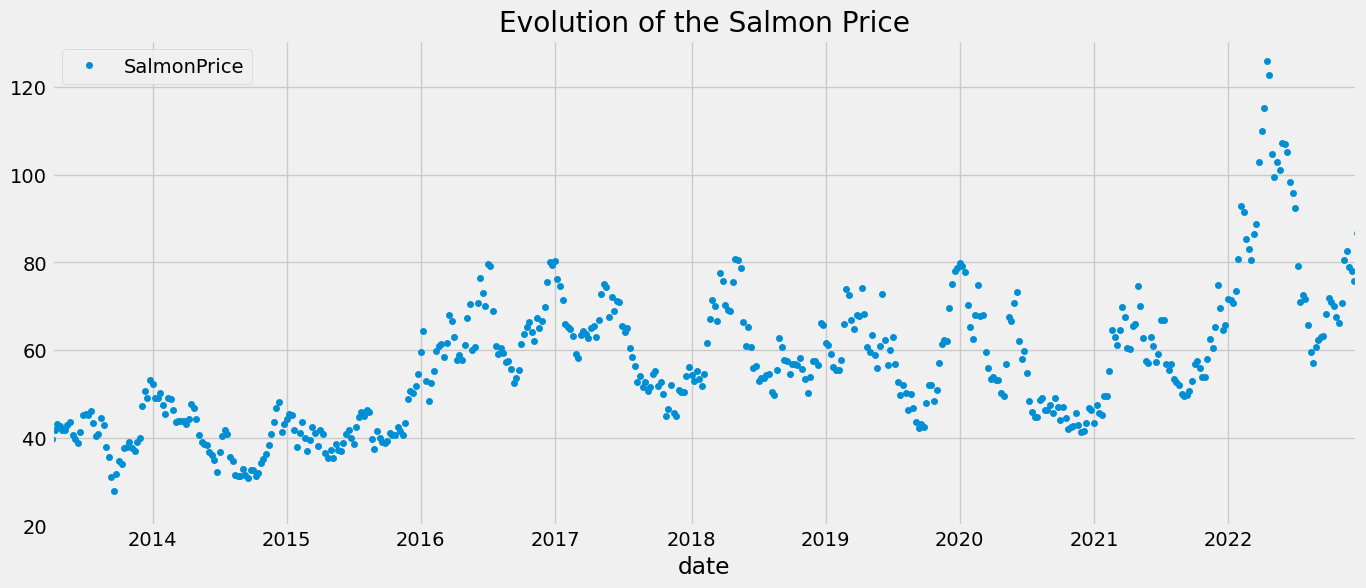

In [45]:
pricegraph = var_set.SalmonPrice.plot(figsize=(15,6), legend=True, title='Evolution of the Salmon Price', yticks = (20, 40, 60, 80, 100, 120), style='.', mew=2)
plt.savefig('Figures/Descriptive/SalmonPriceplot.png', dpi=300, bbox_inches='tight')

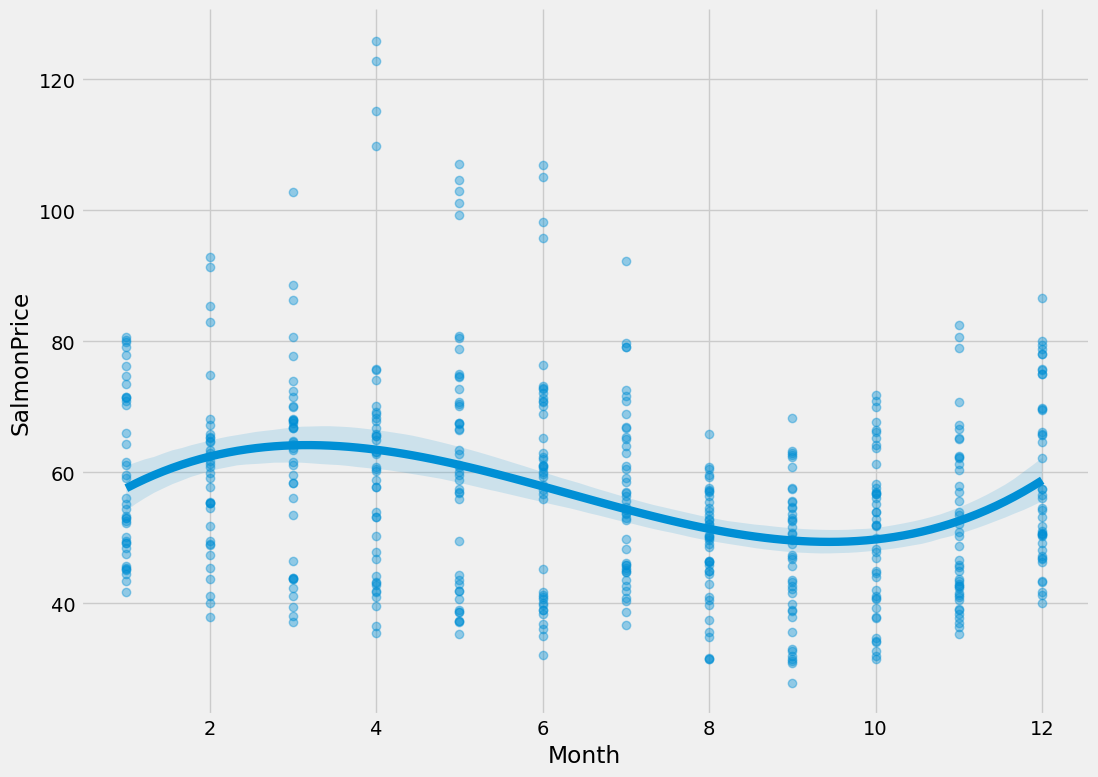

In [59]:
color=sns.color_palette('Set2') 
sns.lmplot(x = 'Month', y = 'SalmonPrice', data = var_set, order=3,scatter_kws={'alpha':0.4}, palette=color, height=8, aspect=1.4)
plt.savefig('Figures/Descriptive/seasonality.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
var_set.dtypes

SalmonPrice     float64
CodPrice        float64
HalibutPrice    float64
CPI             float64
TWI             float64
Month             int64
dtype: object

In [ ]:
var_set.corr()

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI,Month
SalmonPrice,1.000000,0.618946,0.475260,0.641214,0.429407,-0.215305
CodPrice,0.618946,1.000000,0.472403,0.884648,0.800880,0.060235
HalibutPrice,0.475260,0.472403,1.000000,0.422434,0.251690,-0.108150
CPI,0.641214,0.884648,0.422434,1.000000,0.732456,0.066142
TWI,0.429407,0.800880,0.251690,0.732456,1.000000,0.020442
Month,-0.215305,0.060235,-0.108150,0.066142,0.020442,1.000000


In [ ]:
var_set.cov()

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI,Month
SalmonPrice,238.871306,77.454556,58.029708,84.150539,56.709516,-11.348211
CodPrice,77.454556,65.557801,30.217697,60.821149,55.409534,1.663215
HalibutPrice,58.029708,30.217697,62.412827,28.337900,16.990588,-2.913773
CPI,84.150539,60.821149,28.337900,72.101491,53.144554,1.915307
TWI,56.709516,55.409534,16.990588,53.144554,73.014661,0.595681
Month,-11.348211,1.663215,-2.913773,1.915307,0.595681,11.630033


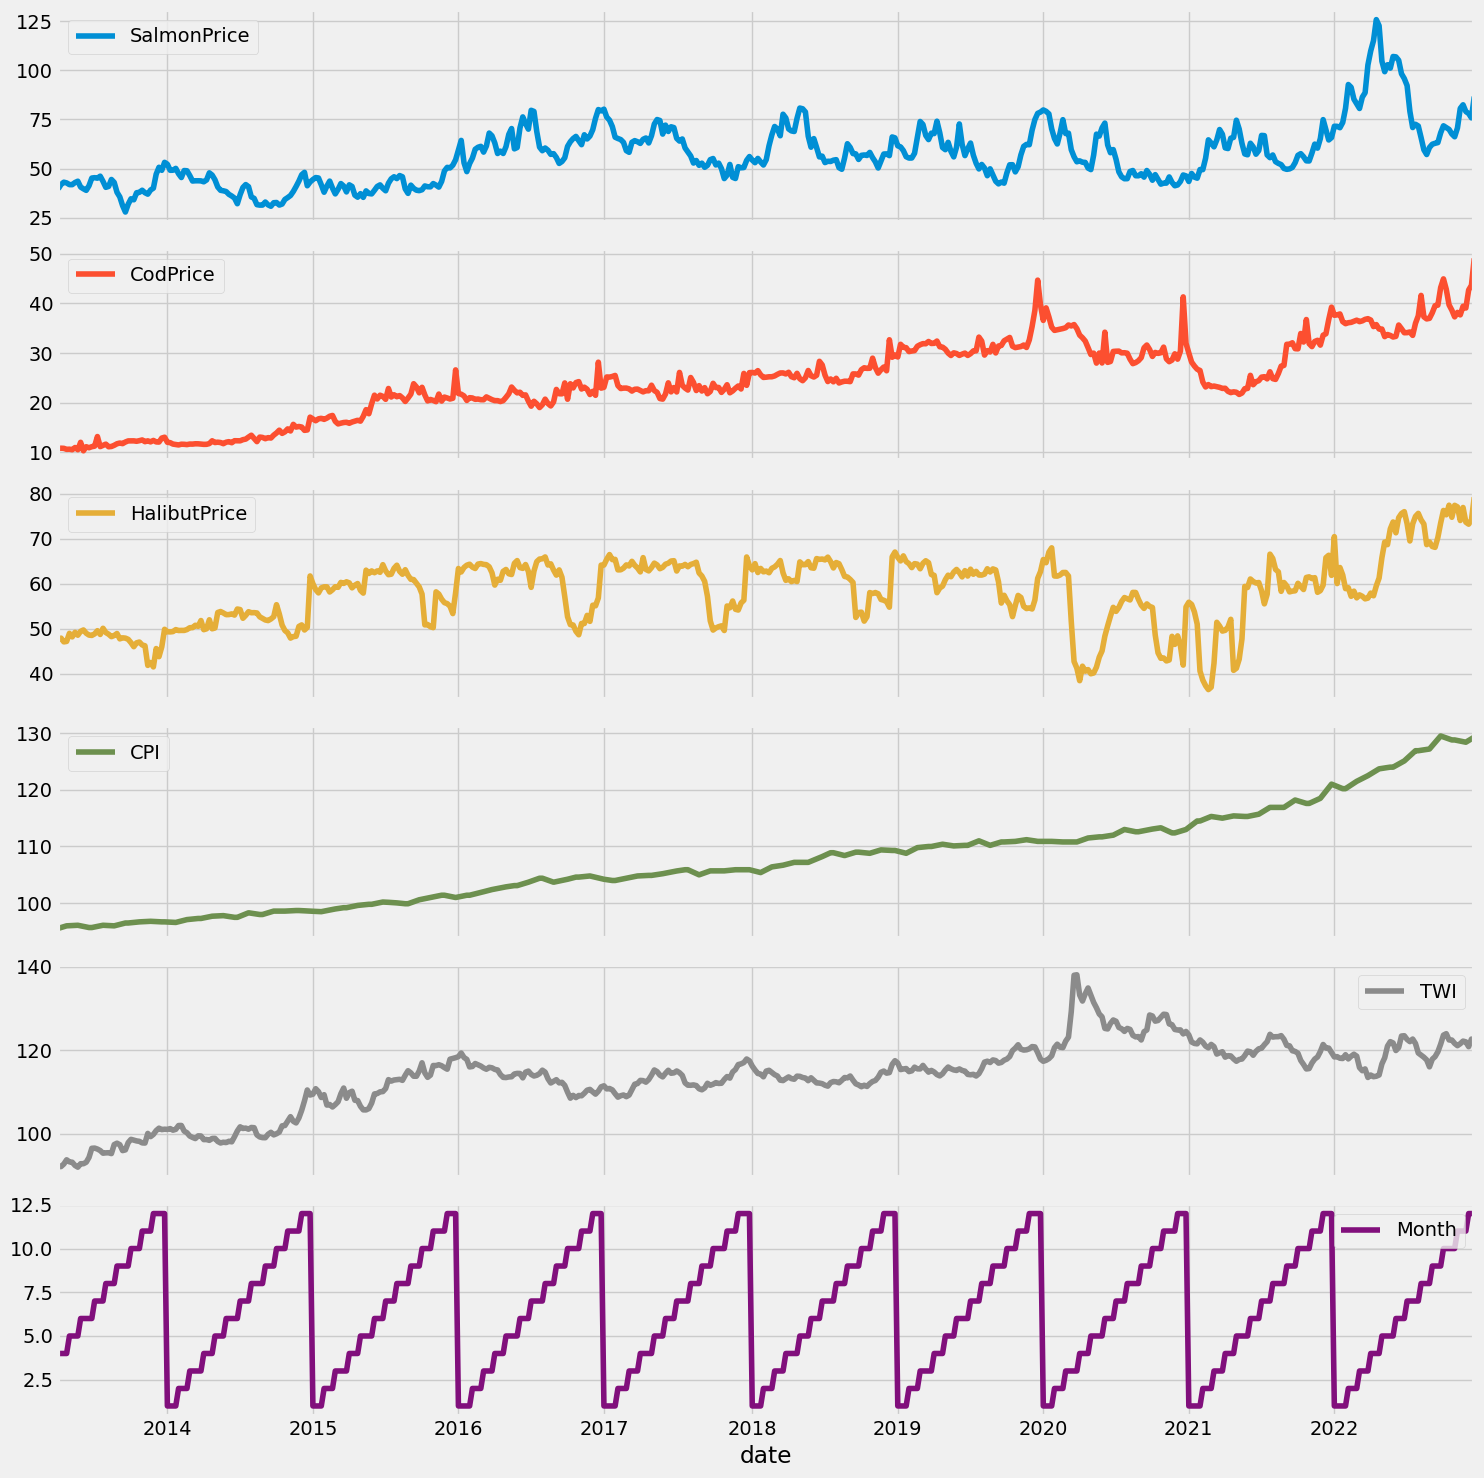

In [ ]:
var_set.plot(subplots = True, figsize=(15,15))

plt.tight_layout()
plt.show()

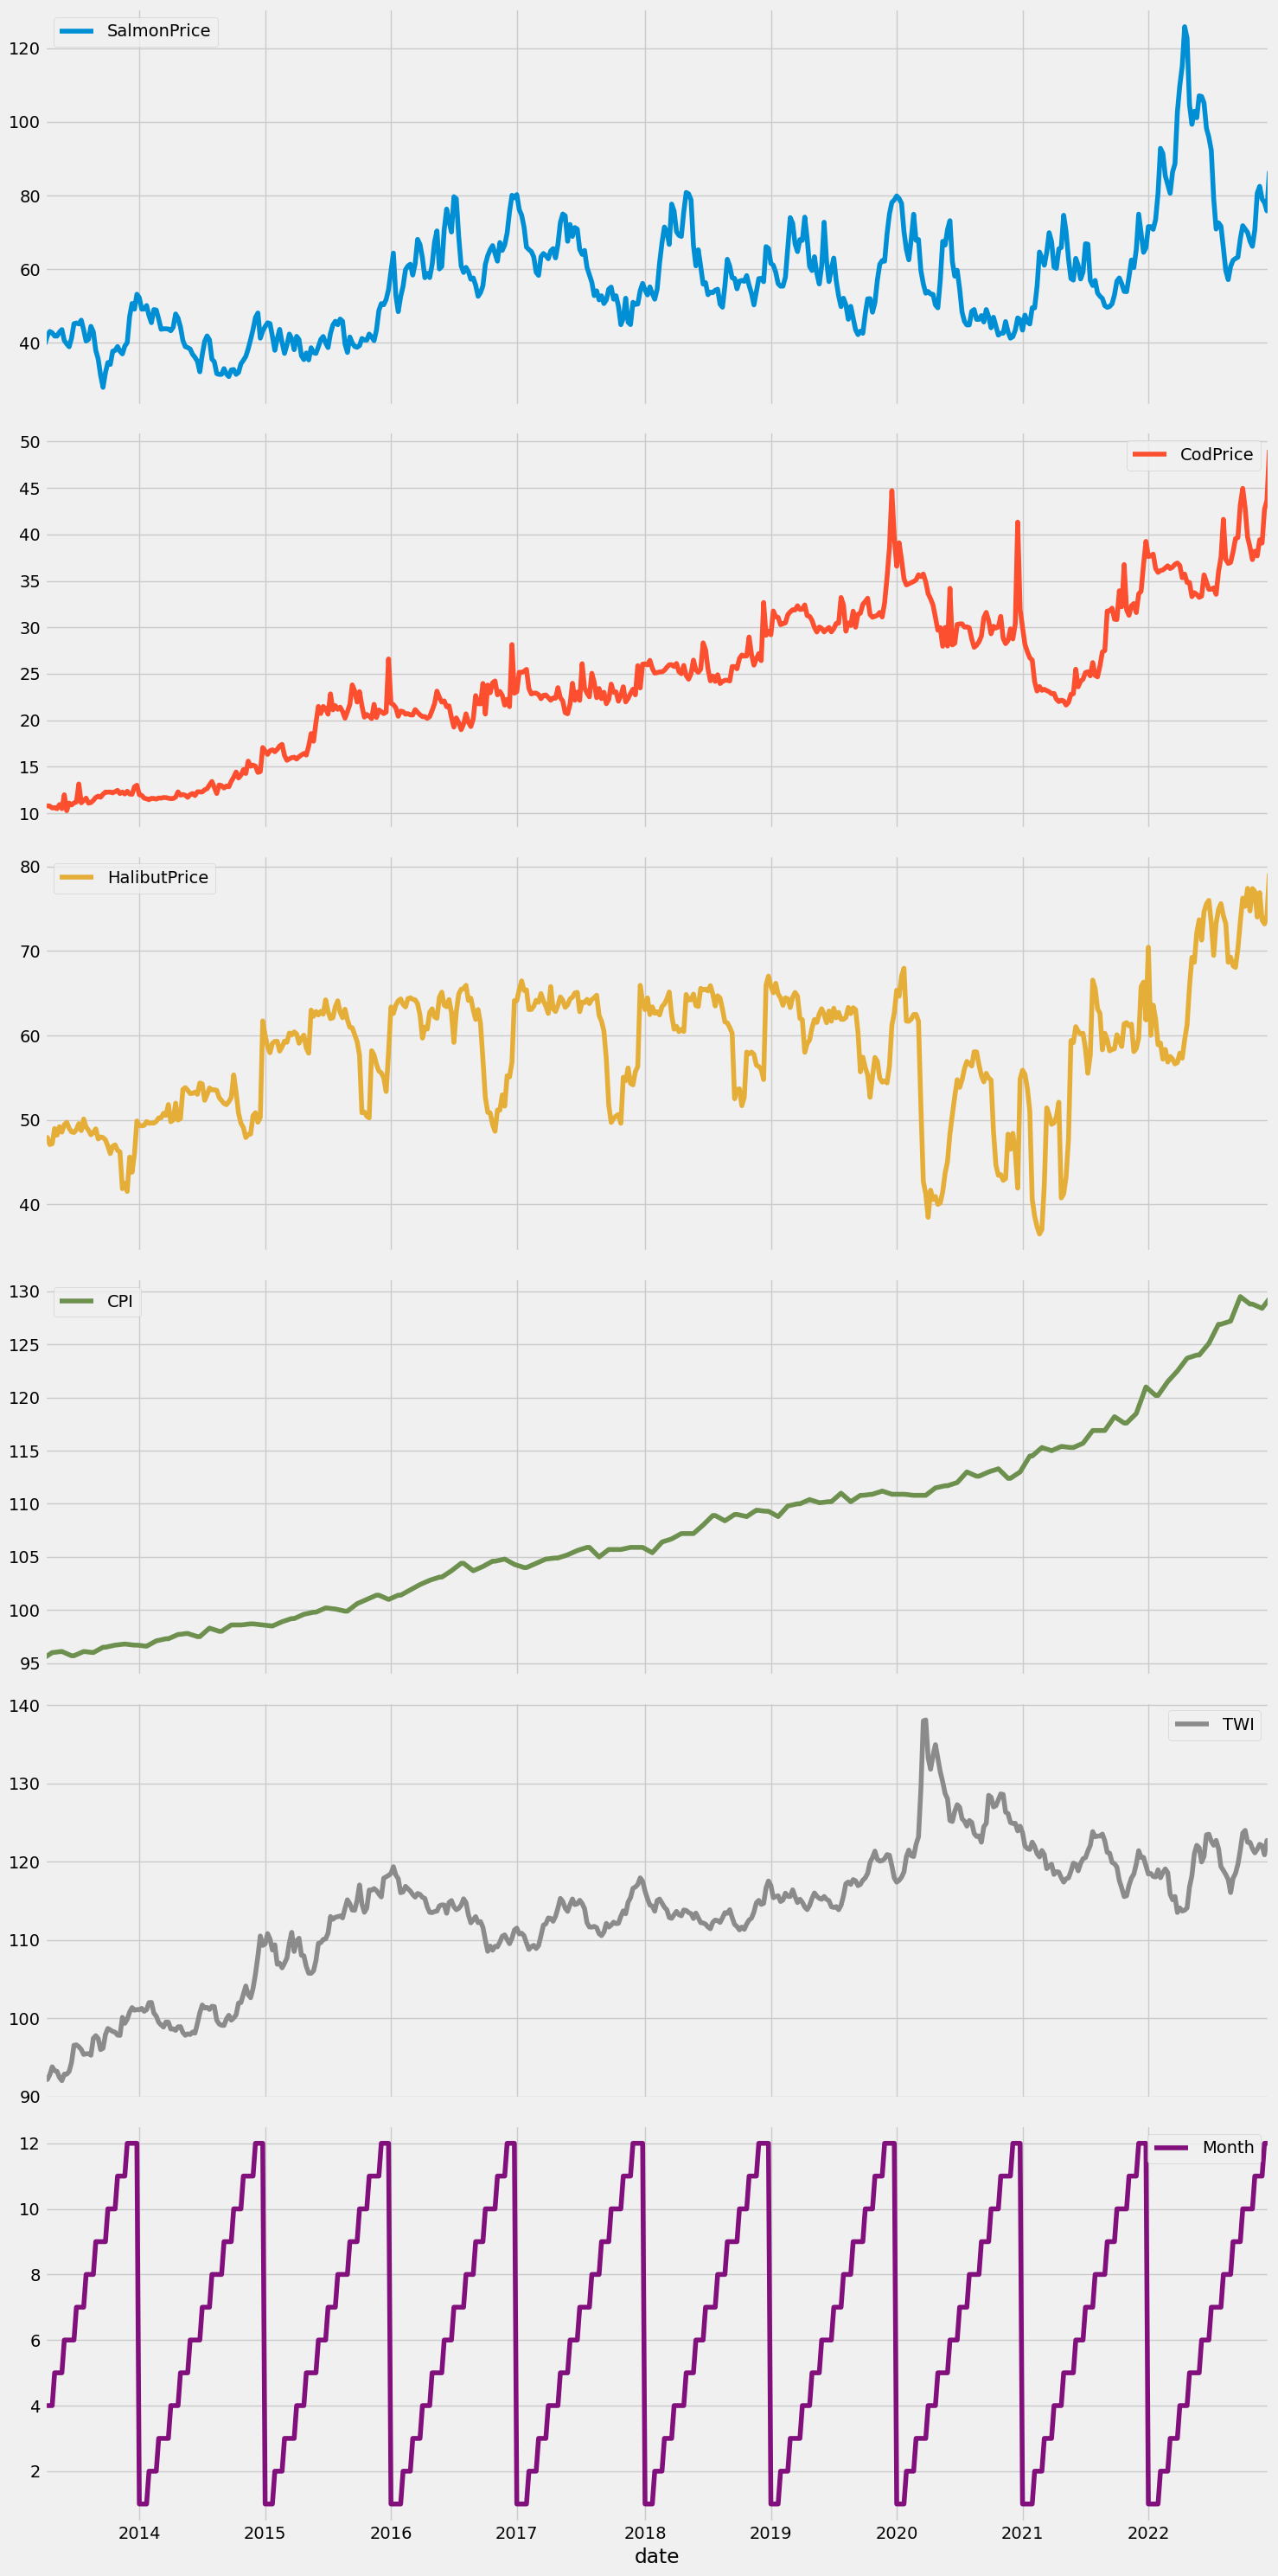

In [ ]:
var_set.plot(subplots = True, figsize=(15,30))

plt.tight_layout()
plt.show()



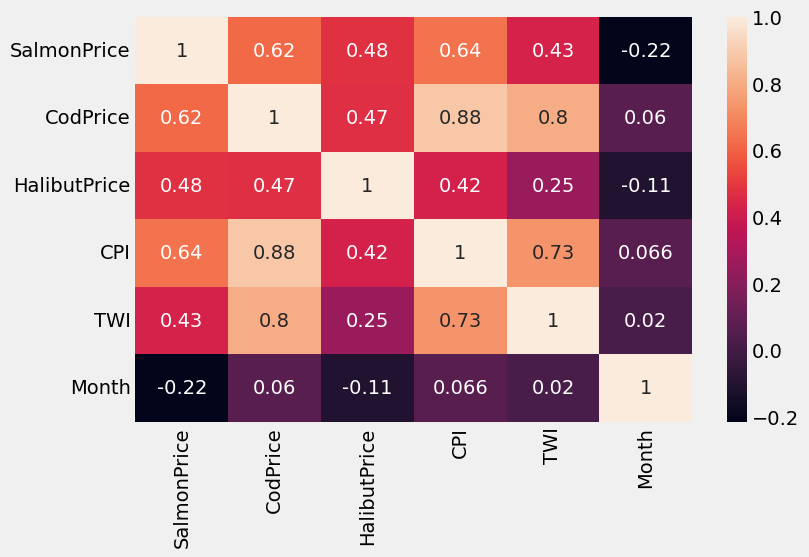

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(var_set.corr(numeric_only=True), annot=True)
plt.show()

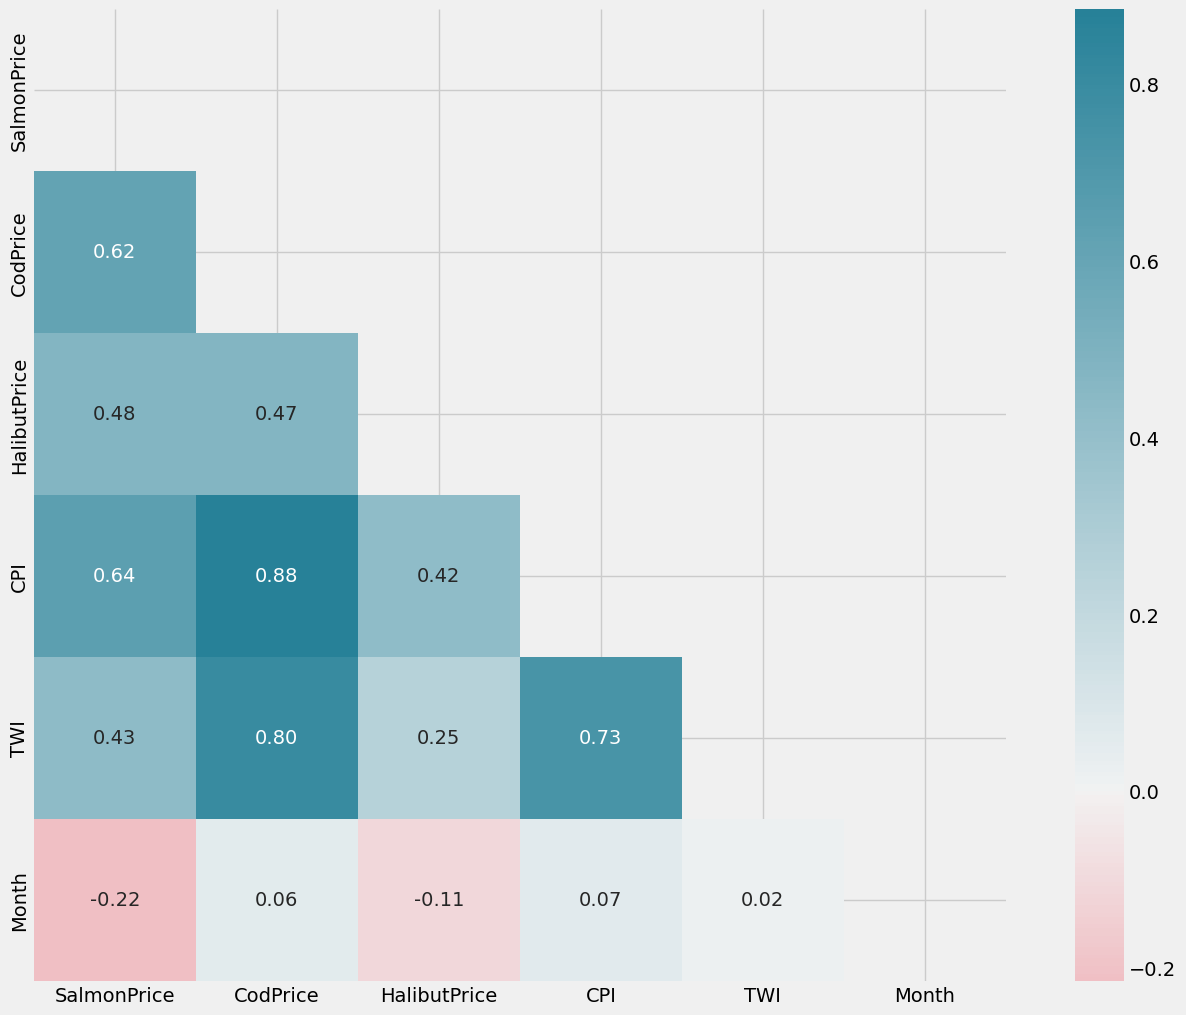

In [66]:
matrix = var_set.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = sns.diverging_palette(10, 220, s=90, l=50,
                            n=7, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.savefig('Figures/Descriptive/CorrMatrix.png', dpi=300, bbox_inches='tight')
plt.show()

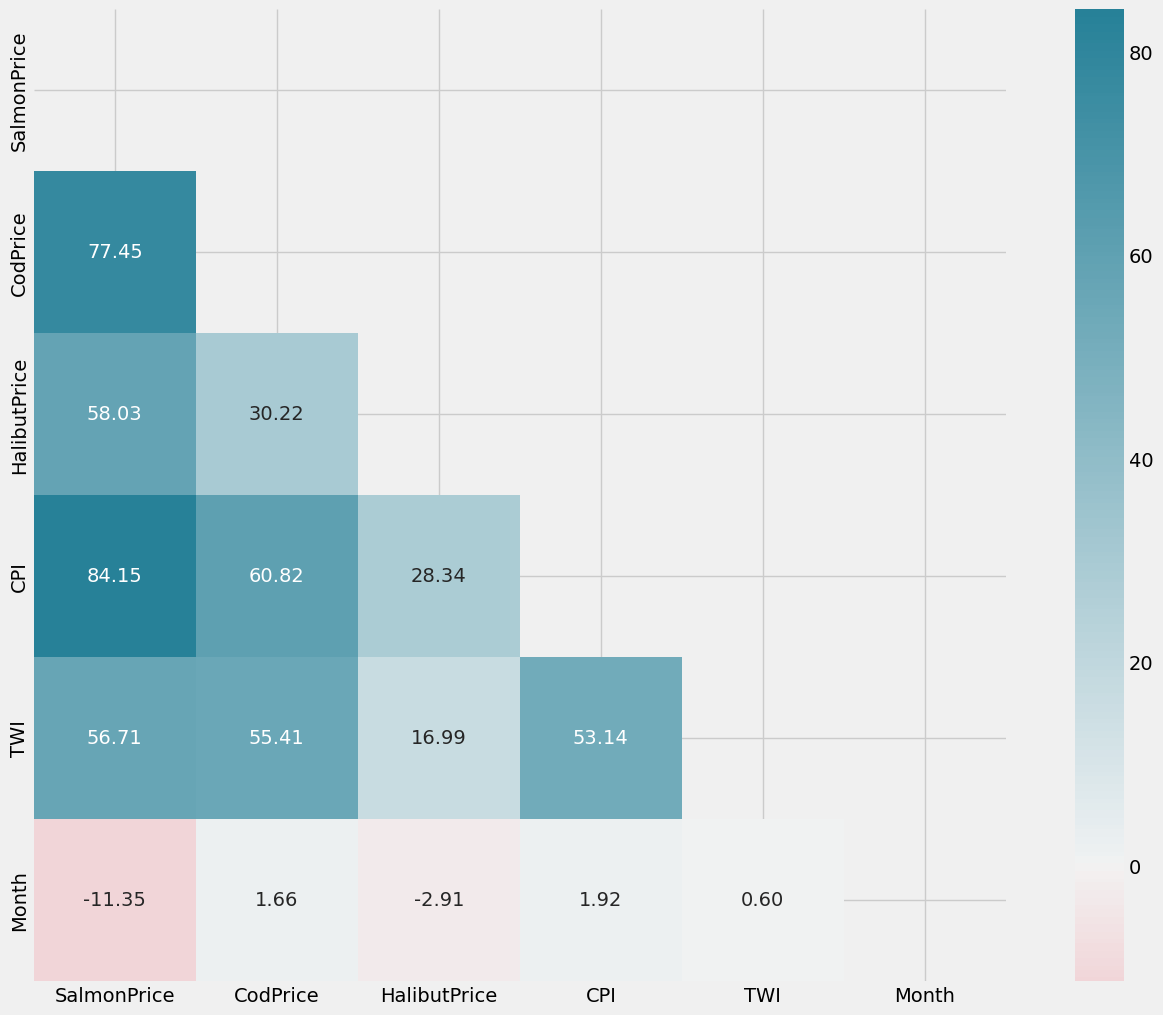

In [67]:
matrix_cov = var_set.cov()

mask_cov = np.triu(np.ones_like(matrix_cov, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(matrix_cov, mask=mask_cov, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.savefig('Figures/Descriptive/CovMatrix.png', dpi=300, bbox_inches='tight')
plt.show()

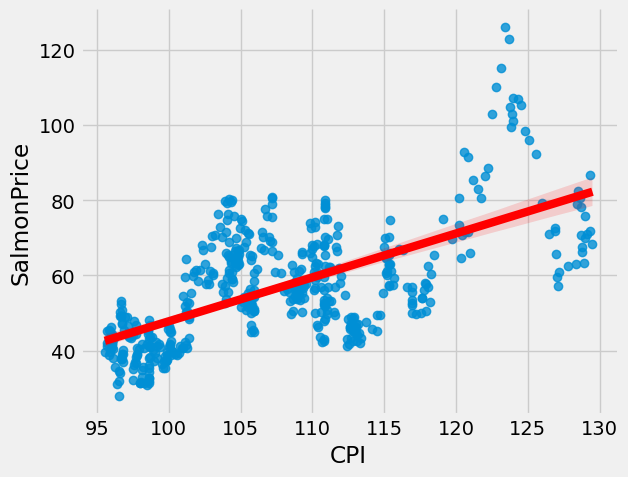

In [ ]:
sns.lmplot(x="CPI", y="SalmonPrice", data=var_set,height=5, aspect=1.3, line_kws={'color': 'red'})

plt.show()